In [1]:
import os
import pandas as pd
import numpy as np
import csv
import folium
import geopandas as gpd
from folium import plugins
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Задаем расположение датасетов с геоданными по ресторанам фастфуда

os.chdir(r'C:\Users\aksen\OneDrive\Рабочий стол\Аналитика данных\Python\командный проект\рестики')

In [3]:
#Выделяем из датасета рестораны фастуда только из интересующих нас городов и отсеиваем лишние

keys = ('name', 'latitude', 'longitude', 'city', 'province', 'postalCode')
records = []

for file in os.listdir():
    with open(file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            records.append({key: row[key] for key in keys})
            
city_list = [['Columbus','OH'], ['Cincinnati','OH'], ['Cleveland','OH'], ['Las Vegas','NV'], ['Miami','FL'], ['Indianapolis', 'IN'], ['Birmingham', 'AL'], ['Portland', 'OR']]
final_records = []

for record in records:
    if record['city'] in [i[0] for i in city_list] and record['province'] in [i[1] for i in city_list]:
        final_records.append(record)
        
for record in final_records:
    record['postalCode'] = record['postalCode'][:5]

In [4]:
#Создаем датасет из выбранных городов с необходимыми параметрами для анализа

df_restaurants = pd.DataFrame(final_records)
df_restaurants.head()

name   latitude    longitude          city province postalCode
0     Five Guys  25.754984   -80.368058         Miami       FL      33174
1  Port of Subs  36.121721  -115.243007     Las Vegas       NV      89103
2  Port of Subs    36.1991  -115.281057     Las Vegas       NV      89128
3  Port of Subs   36.14391  -115.295979     Las Vegas       NV      89117
4   Dairy Queen  39.760374   -86.101163  Indianapolis       IN      46201

In [5]:
#Проверяем полученный датафрейм на наличие дублей

df_restaurants[df_restaurants.duplicated()]

name   latitude    longitude          city province  \
36            McDonald's  36.195232  -115.161299     Las Vegas       NV   
49            McDonald's  36.113844  -115.066665     Las Vegas       NV   
60             Taco Bell  39.904852   -86.058835  Indianapolis       IN   
66           Burger King  25.766086   -80.193785         Miami       FL   
92             Taco Bell  25.810382   -80.189208         Miami       FL   
94             Taco Bell  36.124552  -115.279373     Las Vegas       NV   
128           Carl's Jr.  36.100083  -115.301468     Las Vegas       NV   
141          Chick-fil-A  40.142638   -82.990541      Columbus       OH   
159            Taco Bell  39.222648   -85.912413      Columbus       IN   
169       Steak 'n Shake  39.765665   -86.159998  Indianapolis       IN   
181            Taco Bell  39.867521   -82.934674      Columbus       OH   
208                  KFC  25.831756   -80.216247         Miami       FL   
228           McDonald's  25.761204    -80.35503         Miami       FL   
239               Arby's  39.923849    -82.88054      Columbus       OH   
265          Burger King    25.7703   -80.325563         Miami       FL   
273                  KFC  41.499866    -81.66741     Cleveland       OH   
274                  KFC  41.499866    -81.66741     Cleveland       OH   
284      Chicken Kitchen   25.76571    -80.19218         Miami       FL   
315            Pizza Hut  25.811722   -80.365266         Miami       FL   
612      Jack in the Box  45.415494  -122.631985      Portland       OR   
739         Jimmy John's    39.2862     -84.4671    Cincinnati       OH   
792               Arby's  39.923849    -82.88054      Columbus       OH   
852          Burger King  41.373042   -81.826072     Cleveland       OH   
879       SONIC Drive In   39.09611    -84.27813    Cincinnati       OH   
896          Burger King  39.286461   -84.449052    Cincinnati       OH   
908              Wendy's   39.21051    -84.47418    Cincinnati       OH   
918               Arby's  39.225036   -84.516375    Cincinnati       OH   
936          Burger King  45.394334  -122.747032      Portland       OR   
942          Burger King  39.223404   -84.517544    Cincinnati       OH   
952                  KFC     39.242     -84.5454    Cincinnati       OH   
961          Burger King  41.501359   -81.532359     Cleveland       OH   
962   Long John Silver's  41.419301   -81.759695     Cleveland       OH   
989            Five Guys    25.8978     -80.1622         Miami       FL   
990                  KFC  25.760483    -80.41009         Miami       FL   
992          Burger King    25.7703   -80.325563         Miami       FL   
1003         Burger King  25.759621   -80.367717         Miami       FL   
1025          McDonald's   36.11505   -115.26167     Las Vegas       NV   
1057              Arby's  39.145862   -84.625642    Cincinnati       OH   
1065           Taco Bell  40.085692   -82.957763      Columbus       OH   
1089              Arby's  36.194841  -115.246595     Las Vegas       NV   
1094          McDonald's  45.518568  -122.474804      Portland       OR   
1143                 KFC    39.6661     -86.0945  Indianapolis       IN   
1145          McDonald's  45.586771  -122.738535      Portland       OR   
1164        Jimmy John's   45.52292   -122.69021      Portland       OR   
1183     Jack in the Box  36.220029   -115.27867     Las Vegas       NV   

     postalCode  
36        89106  
49        89121  
60        46250  
66        33130  
92        33137  
94        89147  
128       89147  
141       43240  
159       47201  
169       46225  
181       43207  
208       33150  
228       33174  
239       43232  
265       33144  
273       44115  
274       44115  
284       33131  
315       33178  
612       97267  
739       45246  
792       43232  
852       44130  
879       45245  
896       45246  
908       45216  
918       45231  
936       97224  
942       45231  
952       45231  
961       4

In [6]:
#Построчный анализ дает понимание, что нет дублирующих строк (координаты у ресторанов не повторяются)

In [7]:
#Загружаем датасет с количественной информацией по городам для расчета метрик плотности ресторанов фастфуда

df_city_info = pd.read_csv(r'C:\Users\aksen\OneDrive\Рабочий стол\Аналитика данных\Python\командный проект\city_info.csv', sep=',')
df_city_info.head(10)

city state  city_square  city_population  с_latitude  с_longitude
0      Columbus    OH        550.5           906528   39.983333   -82.983333
1    Cincinnati    OH        206.0           308925   39.133333   -84.500000
2     Cleveland    OH        213.6           367991   41.482222   -81.669722
3     Las Vegas    NV        340.0           641903   36.175000  -115.136389
4         Miami    FL        143.1           442241   25.783333   -80.216667
5  Indianapolis    IN        953.0           882039   39.767778   -86.158056
6    Birmingham    AL        387.3           197575   33.516667   -86.816667
7      Portland    OR        375.6           653115   45.516667  -122.666667

In [8]:
# Расчитаем количество ресторанов на единицу площади города

In [9]:
#Считаем количество ресторанов с группировкой по городам

counts_rest = df_restaurants.groupby('city')['name'].count()
counts_rest = counts_rest.to_dict()
counts_rest

{'Birmingham': 81,
 'Cincinnati': 205,
 'Cleveland': 109,
 'Columbus': 181,
 'Indianapolis': 161,
 'Las Vegas': 200,
 'Miami': 163,
 'Portland': 111}

In [10]:
#Вносим данные в датасет df_city_info

df_city_info['rest_counts'] = df_city_info['city'].map(counts_rest)
df_city_info.head(10)

city state  city_square  city_population  с_latitude  с_longitude  \
0      Columbus    OH        550.5           906528   39.983333   -82.983333   
1    Cincinnati    OH        206.0           308925   39.133333   -84.500000   
2     Cleveland    OH        213.6           367991   41.482222   -81.669722   
3     Las Vegas    NV        340.0           641903   36.175000  -115.136389   
4         Miami    FL        143.1           442241   25.783333   -80.216667   
5  Indianapolis    IN        953.0           882039   39.767778   -86.158056   
6    Birmingham    AL        387.3           197575   33.516667   -86.816667   
7      Portland    OR        375.6           653115   45.516667  -122.666667   

   rest_counts  
0          181  
1          205  
2          109  
3          200  
4          163  
5          161  
6           81  
7          111

In [11]:
#Считаем плотность ресторанов фастфуда на единицу площади города (шт/км2). 

df_city_info['rest_density'] = df_city_info['rest_counts'] / df_city_info['city_square']
df_city_info.head()

city state  city_square  city_population  с_latitude  с_longitude  \
0    Columbus    OH        550.5           906528   39.983333   -82.983333   
1  Cincinnati    OH        206.0           308925   39.133333   -84.500000   
2   Cleveland    OH        213.6           367991   41.482222   -81.669722   
3   Las Vegas    NV        340.0           641903   36.175000  -115.136389   
4       Miami    FL        143.1           442241   25.783333   -80.216667   

   rest_counts  rest_density  
0          181      0.328792  
1          205      0.995146  
2          109      0.510300  
3          200      0.588235  
4          163      1.139064

In [12]:
#Расчитаем количество жителей города на один ресторан

df_city_info['people_per_rest'] = df_city_info['city_population'] / df_city_info['rest_counts']
df_city_info = df_city_info.sort_values(by=['people_per_rest'], ascending=False)
df_city_info.head(10)

city state  city_square  city_population  с_latitude  с_longitude  \
7      Portland    OR        375.6           653115   45.516667  -122.666667   
5  Indianapolis    IN        953.0           882039   39.767778   -86.158056   
0      Columbus    OH        550.5           906528   39.983333   -82.983333   
2     Cleveland    OH        213.6           367991   41.482222   -81.669722   
3     Las Vegas    NV        340.0           641903   36.175000  -115.136389   
4         Miami    FL        143.1           442241   25.783333   -80.216667   
6    Birmingham    AL        387.3           197575   33.516667   -86.816667   
1    Cincinnati    OH        206.0           308925   39.133333   -84.500000   

   rest_counts  rest_density  people_per_rest  
7          111      0.295527      5883.918919  
5          161      0.168940      5478.503106  
0          181      0.328792      5008.441989  
2          109      0.510300      3376.064220  
3          200      0.588235      3209.515000  
4          163      1.139064      2713.134969  
6           81      0.209140      2439.197531  
1          205      0.995146      1506.951220

<Axes: title={'center': 'Обеспеченность жителей города фастфуд ресторанами'}, xlabel='Число жителей на один фастфуд ресторан', ylabel='Города'>

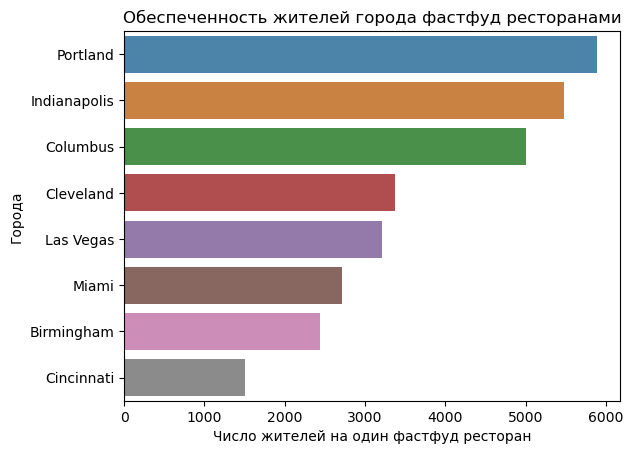

In [13]:
#Визуализация числа жителей города на один фастфуд ресторан
custom_palete = {'Portland':'#3b86b9', 'Indianapolis':'#e1812c', 'Columbus':'#3e9c3e', 'Cleveland':'#c03d3e', 'Las Vegas':'#9372b2', 'Miami':'#8e625a', 'Birmingham':'#d684bd', 'Cincinnati':'#8b8b8b'}
pic = sns.barplot(df_city_info, x='people_per_rest', y='city', palette=custom_palete)
pic.set(xlabel='Число жителей на один фастфуд ресторан', ylabel='Города', title='Обеспеченность жителей города фастфуд ресторанами')
pic

In [14]:
#Визуализация плотности расположения фастфуд ресторанов (штук на км2)

df_city_info_rest_density = df_city_info[['city', 'rest_density']]
df_city_info_rest_density = df_city_info_rest_density.sort_values(by=['rest_density'], ascending=False)
pic_1 = sns.barplot(df_city_info_rest_density, x='rest_density', y='city', palette=custom_palete)
pic_1.set(xlabel='Плотность фастфуд ресторанов в городе (шт/км2) ', ylabel='Города', title='Плотность расположения фастфуд ресторанов в городе')
pic_1

<Axes: title={'center': 'Плотность расположения фастфуд ресторанов в городе'}, xlabel='Плотность фастфуд ресторанов в городе (шт/км2) ', ylabel='Города'>

In [15]:
#Создаем карту районов города с отображением плотности ресторанов (цветом) в каждом районе

In [16]:
#Загружаем границы административных единиц США
data_boundaries = gpd.read_file(r'C:\Users\aksen\OneDrive\Рабочий стол\Аналитика данных\Python\командный проект\map\zip_boundaries\USA_ZIP_Code_Boundaries.geojson')

In [17]:
os.chdir(r'C:\Users\aksen\OneDrive\Рабочий стол\Аналитика данных\Python\командный проект\map\traffic_objects')

In [18]:
keys_traffic = ('latitude', 'longitude', 'name')

In [19]:
#Portland

In [20]:
#Подсчет ресторанов в Portland с группировкой по районам (postalCode)
df_restaurants_portland = df_restaurants[df_restaurants['city']=='Portland']
counts_rest_zip_portland = df_restaurants_portland.groupby('postalCode')['name'].count()
rest_zip_portland = pd.DataFrame(counts_rest_zip_portland)
rest_zip_portland = rest_zip_portland.reset_index()

#Определяем датасет с границами районов
data_boundaries_portland = data_boundaries[(data_boundaries['STATE']=='OR')&(data_boundaries['PO_NAME']=='Portland')]

#Координаты центра города
locate_portland=[float(df_city_info[df_city_info['city']=='Portland']['с_latitude'].values), float(df_city_info[df_city_info['city']=='Portland']['с_longitude'].values)]

#Создаем карту города
portland = folium.Map(location=locate_portland, zoom_start=11)

#Создаем слой с отображением цветом плотности фастфуд ресторанов в городе 
choropleth_portland = folium.Choropleth(
geo_data=data_boundaries_portland,
fill_opacity=0.5,
line_opacity=0.6, 
data=rest_zip_portland,
columns=['postalCode', 'name'],
fill_color='Reds',
key_on='feature.properties.ZIP_CODE',
legend_name="Кол-во ресторанов фастфуда в районе",
name = 'Кол-во ресторанов фастфуда в районе').add_to(portland)

#Создаем возможность видеть postalCode района на карте при наведении мыши
choropleth_portland.geojson.add_child(folium.features.GeoJsonTooltip(['ZIP_CODE',], labels=False))

#Создаем датасет с геокоординатами объектов, образующих пешеходный трафик (из датасетов по городу)
portland_traffic = []

for file in os.listdir():
    if 'Portland' in file:
        with open(file, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                portland_traffic.append({key: row[key] for key in keys_traffic})

#Задаем списки координат объектов для загрузки на карту
latitudes_portland = [float(x['latitude']) for x in portland_traffic]
longitudes_portland = [float(x['longitude']) for x in portland_traffic]

#Создаем heatmap с трафикообразующими объектами
plugins.HeatMap(list(zip(latitudes_portland, longitudes_portland)), radius=10, name='объекты ретейла и развлечений', gradient={0.1: 'blue', 0.55: 'lime', 1: 'red'}).add_to(portland)
folium.LayerControl().add_to(portland)

#Отобразим конкурентные рестораны фастфуда на карте
df_restaurants_portland['latitude'] = df_restaurants_portland['latitude'].astype('float')
df_restaurants_portland['longitude'] = df_restaurants_portland['longitude'].astype('float')

for i in range(0,len(df_restaurants_portland)):
    folium.CircleMarker(
      location=[df_restaurants_portland.iloc[i]['latitude'], df_restaurants_portland.iloc[i]['longitude']],
        radius=2,
        color='red'
   ).add_to(portland)

#Круговой маркер, указывающий на рекомендуемый район для открытия ресторана (выбран после визуального анализа построенной
#интерактивной карты)
folium.CircleMarker(
    location=[45.518056, -122.684070],
    radius=50,
    color="#3186cc",
).add_to(portland)

portland

C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\375352858.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_portland['latitude'] = df_restaurants_portland['latitude'].astype('float')
C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\375352858.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_portland['longitude'] = df_restaurants_portland['longitude'].astype('float')


In [21]:
#Методология для анализа

#Для открытия нашего заведения предлагаем исключать районы с очень низкой и очень высокой плотностями
#    ресторанов фастфуда на каждый район, поскольку низкаая плотность говорит о заниженном спросе со стороны покупателя,
#    а высокая плотность сулит высокой конкуренцией для захода на рынок. Оптимальными будем считать районы с количеством
#    3-7 заведений на район. Далее определяем подходящие районы и оцениваем также концентрацию трафикообразующих объектов
#    в выбранных районах (heatmap). Выбираем оптимальный район, ограничиваем локацию пересечением улиц на карте.

In [22]:
#Анализ для Portland

#Выбираем район с postalCode 97205,
#пересечение улиц:
#    Southwest 13th Avenue,
#    Southwest Harvey Milk Street,
#    Southwest Broadway,
#    Southwest Clay Street.

In [23]:
#Повторяем вышеописанные шаги для всех интересующих нас городов

In [24]:
#Birmingham

In [25]:
#Подсчет ресторанов в Birmingham с группировкой по районам (postalCode)
df_restaurants_birmingham = df_restaurants[df_restaurants['city']=='Birmingham']
counts_rest_zip_birmingham = df_restaurants_birmingham.groupby('postalCode')['name'].count()
rest_zip_birmingham = pd.DataFrame(counts_rest_zip_birmingham)
rest_zip_birmingham = rest_zip_birmingham.reset_index()

#Определяем датасет с границами районов
data_boundaries_birmingham = data_boundaries[(data_boundaries['STATE']=='AL')&(data_boundaries['PO_NAME']=='Birmingham')]

#Координаты центра города
locate=[float(df_city_info[df_city_info['city']=='Birmingham']['с_latitude'].values), float(df_city_info[df_city_info['city']=='Birmingham']['с_longitude'].values)]

#Создаем карту города
birmingham = folium.Map(location=locate, zoom_start=11)

#Создаем слой с отображением цветом плотности фастфуд ресторанов в городе  
choropleth_birmingham = folium.Choropleth(
geo_data=data_boundaries_birmingham,
fill_opacity=0.5,
line_opacity=0.6, 
data=rest_zip_birmingham,
columns=['postalCode', 'name'],
fill_color='Reds',
key_on='feature.properties.ZIP_CODE',
legend_name="Кол-во ресторанов фастфуда в районе",
name = 'Кол-во ресторанов фастфуда в районе').add_to(birmingham)

#Создаем возможность видеть postalCode района на карте при наведении мыши
choropleth_birmingham.geojson.add_child(folium.features.GeoJsonTooltip(['ZIP_CODE',], labels=False))

#Создаем датасет с геокоординатами объектов, образующих пешеходный трафик (из датасетов по городу)
birmingham_traffic = []

for file in os.listdir():
    if 'Birmingham' in file:
        with open(file, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                birmingham_traffic.append({key: row[key] for key in keys_traffic})

#Задаем списки координат объектов для загрузки на карту
latitudes_birmingham = [float(x['latitude']) for x in birmingham_traffic]
longitudes_birmingham = [float(x['longitude']) for x in birmingham_traffic]

#Создаем heatmap с объектами
plugins.HeatMap(list(zip(latitudes_birmingham, longitudes_birmingham)), radius=10, name='объекты ретейла и развлечений', gradient={0.1: 'blue', 0.55: 'lime', 1: 'red'}).add_to(birmingham)
folium.LayerControl().add_to(birmingham)

#Отобразим рестораны фастфуда на карте
df_restaurants_birmingham['latitude'] = df_restaurants_birmingham['latitude'].astype('float')
df_restaurants_birmingham['longitude'] = df_restaurants_birmingham['longitude'].astype('float')

for i in range(0,len(df_restaurants_birmingham)):
    folium.CircleMarker(
      location=[df_restaurants_birmingham.iloc[i]['latitude'], df_restaurants_birmingham.iloc[i]['longitude']],
        radius=2,
        color='red'
   ).add_to(birmingham)

#Круговой маркер для нахождения рекомендуемого района
folium.CircleMarker(
    location=[33.469379, -86.822001],
    radius=50,
    color="#3186cc"
).add_to(birmingham)

birmingham

C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\2112560369.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_birmingham['latitude'] = df_restaurants_birmingham['latitude'].astype('float')
C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\2112560369.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_birmingham['longitude'] = df_restaurants_birmingham['longitude'].astype('float')


In [26]:
#Анализ для Birmingham

#Выбираем район с postalCode 35209,
#пересечение улиц:
#    Valley Avenue,
#    Green Springs Highway,
#    Palisades Boulevard. 

In [27]:
#Miami

In [28]:
#Подсчет ресторанов в Miami с группировкой по районам (postalCode)
df_restaurants_miami = df_restaurants[df_restaurants['city']=='Miami']
counts_rest_zip_miami = df_restaurants_miami.groupby('postalCode')['name'].count()
rest_zip_miami = pd.DataFrame(counts_rest_zip_miami)
rest_zip_miami = rest_zip_miami.reset_index()

#Определяем датасет с границами районов
data_boundaries_miami = data_boundaries[(data_boundaries['STATE']=='FL')&(data_boundaries['PO_NAME']=='Miami')]

#Координаты центра города
locate_miami=[float(df_city_info[df_city_info['city']=='Miami']['с_latitude'].values), float(df_city_info[df_city_info['city']=='Miami']['с_longitude'].values)]

#Создаем карту города
miami = folium.Map(location=locate_miami, zoom_start=11)

#Создаем слой с отображением цветом плотности фастфуд ресторанов в городе 
choropleth_miami = folium.Choropleth(
geo_data=data_boundaries_miami,
fill_opacity=0.5,
line_opacity=0.6, 
data=rest_zip_miami,
columns=['postalCode', 'name'],
fill_color='Reds',
key_on='feature.properties.ZIP_CODE',
legend_name="Кол-во ресторанов фастфуда в районе",
name = 'Кол-во ресторанов фастфуда в районе').add_to(miami)

#Создаем возможность видеть postalCode района на карте при наведении мыши
choropleth_miami.geojson.add_child(folium.features.GeoJsonTooltip(['ZIP_CODE',], labels=False))

#Создаем датасет с геокоординатами объектов, образующих пешеходный трафик (из датасетов по городу)
miami_traffic = []

for file in os.listdir():
    if 'Miami' in file:
        with open(file, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                miami_traffic.append({key: row[key] for key in keys_traffic})

#Задаем списки координат объектов для загрузки на карту
latitudes_miami = [float(x['latitude']) for x in miami_traffic]
longitudes_miami = [float(x['longitude']) for x in miami_traffic]

#Создаем heatmap с объектами
plugins.HeatMap(list(zip(latitudes_miami, longitudes_miami)), radius=10, name='объекты ретейла и развлечений', gradient={0.1: 'blue', 0.55: 'lime', 1: 'red'}).add_to(miami)
folium.LayerControl().add_to(miami)

#Отобразим рестораны фастфуда на карте
df_restaurants_miami['latitude'] = df_restaurants_miami['latitude'].astype('float')
df_restaurants_miami['longitude'] = df_restaurants_miami['longitude'].astype('float')

for i in range(0,len(df_restaurants_miami)):
    folium.CircleMarker(
      location=[df_restaurants_miami.iloc[i]['latitude'], df_restaurants_miami.iloc[i]['longitude']],
        radius=2,
        color='red'
   ).add_to(miami)

#Круговой маркер для нахождения рекомендуемого района
folium.CircleMarker(
    location=[25.807896, -80.193307],
    radius=50,
    color="#3186cc"
).add_to(miami)

miami

C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\205072766.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_miami['latitude'] = df_restaurants_miami['latitude'].astype('float')
C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\205072766.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_miami['longitude'] = df_restaurants_miami['longitude'].astype('float')


In [29]:
#Анализ для Miami

#Выбираем район с postalCode 33137,
#пересечение улиц:
#    North Miami Avenue,
#    Northeast 36th Street,
#    Northeast 2nd Avenue,
#   Northeast 29th Street.

In [30]:
#Indianapolis

In [31]:
#Подсчет ресторанов в Indianapolis с группировкой по районам (postalCode)
df_restaurants_indianapolis = df_restaurants[df_restaurants['city']=='Indianapolis']
counts_rest_zip_indianapolis = df_restaurants_indianapolis.groupby('postalCode')['name'].count()
rest_zip_indianapolis = pd.DataFrame(counts_rest_zip_indianapolis)
rest_zip_indianapolis = rest_zip_indianapolis.reset_index()

#Определяем датасет с границами районов
data_boundaries_indianapolis = data_boundaries[(data_boundaries['STATE']=='IN')&(data_boundaries['PO_NAME']=='Indianapolis')]

#Координаты центра города
locate_indianapolis=[float(df_city_info[df_city_info['city']=='Indianapolis']['с_latitude'].values), float(df_city_info[df_city_info['city']=='Indianapolis']['с_longitude'].values)]

#Создаем карту города
indianapolis = folium.Map(location=locate_indianapolis, zoom_start=11)

#Создаем слой с отображением цветом плотности фастфуд ресторанов в городе 
choropleth_indianapolis = folium.Choropleth(
geo_data=data_boundaries_indianapolis,
fill_opacity=0.5,
line_opacity=0.6, 
data=rest_zip_indianapolis,
columns=['postalCode', 'name'],
fill_color='Reds',
key_on='feature.properties.ZIP_CODE',
legend_name="Кол-во ресторанов фастфуда в районе",
name = 'Кол-во ресторанов фастфуда в районе').add_to(indianapolis)

#Создаем возможность видеть postalCode района на карте при наведении мыши
choropleth_indianapolis.geojson.add_child(folium.features.GeoJsonTooltip(['ZIP_CODE',], labels=False))

#Создаем датасет с геокоординатами объектов, образующих пешеходный трафик (из датасетов по городу)
indianapolis_traffic = []

for file in os.listdir():
    if 'Indianapolis' in file:
        with open(file, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                indianapolis_traffic.append({key: row[key] for key in keys_traffic})

#Задаем списки координат объектов для загрузки на карту
latitudes_indianapolis = [float(x['latitude']) for x in indianapolis_traffic]
longitudes_indianapolis = [float(x['longitude']) for x in indianapolis_traffic]

#Создаем heatmap с объектами
plugins.HeatMap(list(zip(latitudes_indianapolis, longitudes_indianapolis)), radius=10, name='объекты ретейла и развлечений', gradient={0.1: 'blue', 0.55: 'lime', 1: 'red'}).add_to(indianapolis)
folium.LayerControl().add_to(indianapolis)

#Отобразим рестораны фастфуда на карте
df_restaurants_indianapolis['latitude'] = df_restaurants_indianapolis['latitude'].astype('float')
df_restaurants_indianapolis['longitude'] = df_restaurants_indianapolis['longitude'].astype('float')

for i in range(0,len(df_restaurants_indianapolis)):
    folium.CircleMarker(
      location=[df_restaurants_indianapolis.iloc[i]['latitude'], df_restaurants_indianapolis.iloc[i]['longitude']],
        radius=2,
        color='red'
   ).add_to(indianapolis)

#Круговой маркер для нахождения рекомендуемого района
folium.CircleMarker(
    location=[39.772931, -86.161497],
    radius=50,
    color="#3186cc"
).add_to(indianapolis)

indianapolis

C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\2938394679.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_indianapolis['latitude'] = df_restaurants_indianapolis['latitude'].astype('float')
C:\Users\aksen\AppData\Local\Temp\ipykernel_1148\2938394679.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants_indianapolis['longitude'] = df_restaurants_indianapolis['longitude'].astype('float')


In [32]:
#Анализ для Indianapolis

#Выбираем район с postalCode 46202, 46204 (их граница),
#пересечение улиц:
#    West Michigan Street,
#    Indiana Avenue,
#    North Illinois Street.

In [33]:
#Cleveland

In [34]:
#Подсчет ресторанов в Cleveland с группировкой по районам (postalCode)
df_restaurants_cleveland = df_restaurants[df_restaurants['city']=='Cleveland'].reset_index(drop=True)
counts_rest_zip_cleveland = df_restaurants_cleveland.groupby('postalCode')['name'].count()
rest_zip_cleveland = pd.DataFrame(counts_rest_zip_cleveland)
rest_zip_cleveland = rest_zip_cleveland.reset_index()

#Определяем датасет с границами районов
data_boundaries_cleveland = data_boundaries[(data_boundaries['STATE']=='OH')&(data_boundaries['PO_NAME']=='Cleveland')]

#Координаты центра города
locate_cleveland=[float(df_city_info[df_city_info['city']=='Cleveland']['с_latitude'].values), float(df_city_info[df_city_info['city']=='Cleveland']['с_longitude'].values)]

#Создаем карту города
cleveland = folium.Map(location=locate_cleveland, zoom_start=11)

#Создаем слой с отображением цветом плотности фастфуд ресторанов в городе 
choropleth_cleveland = folium.Choropleth(
geo_data=data_boundaries_cleveland,
fill_opacity=0.5,
line_opacity=0.6, 
data=rest_zip_cleveland,
columns=['postalCode', 'name'],
fill_color='Reds',
key_on='feature.properties.ZIP_CODE',
legend_name="Кол-во ресторанов фастфуда в районе",
name = 'Кол-во ресторанов фастфуда в районе').add_to(cleveland)

#Создаем возможность видеть postalCode района на карте при наведении мыши
choropleth_cleveland.geojson.add_child(folium.features.GeoJsonTooltip(['ZIP_CODE',], labels=False))

#Создаем датасет с геокоординатами объектов, образующих пешеходный трафик (из датасетов по городу)
cleveland_traffic = []

for file in os.listdir():
    if 'Cleveland' in file:
        with open(file, 'r') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                cleveland_traffic.append({key: row[key] for key in keys_traffic})

#Задаем списки координат объектов для загрузки на карту
latitudes_cleveland = [float(x['latitude']) for x in cleveland_traffic]
longitudes_cleveland = [float(x['longitude']) for x in cleveland_traffic]

#Создаем heatmap с объектами
plugins.HeatMap(list(zip(latitudes_cleveland, longitudes_cleveland)), radius=10, name='объекты ретейла и развлечений', gradient={0.1: 'blue', 0.55: 'lime', 1: 'red'}).add_to(cleveland)

#Отобразим рестораны фастфуда на карте
df_restaurants_cleveland['latitude'] = df_restaurants_cleveland['latitude'].astype('float')
df_restaurants_cleveland['longitude'] = df_restaurants_cleveland['longitude'].astype('float')

for i in range(0,len(df_restaurants_cleveland)):
    folium.CircleMarker(
      location=[df_restaurants_cleveland.iloc[i]['latitude'], df_restaurants_cleveland.iloc[i]['longitude']],
        radius=2,
        color='red'
   ).add_to(cleveland)

#Круговой маркер для нахождения рекомендуемого района
folium.CircleMarker(
    location=[41.497725, -81.693972],
    radius=50,
    color="#3186cc",
    name = 'Действующие фастфуд-рестораны'
).add_to(cleveland)

folium.LayerControl().add_to(cleveland)

cleveland

In [35]:
#Анализ для Cleveland

#Выбираем район с postalCode 44113,
#пересечение улиц:
#    West Superior Avenue,
#    West Roadway,
#    Ontario Street,
#    West Huron Road.